In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
os.listdir("/content/gdrive/MyDrive/Projects/Chest CT-Scan/Data")

['test', 'train', 'valid']

In [ ]:
from tqdm import tqdm
from google.colab.patches import cv2_imshow
import cv2


In [ ]:
train_data_path = "/content/gdrive/MyDrive/Projects/Chest CT-Scan/Data/train"

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
print(tf. __version__) 

2.7.0


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=5, width_shift_range=0.2,height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

In [ ]:
train_dataset  = train_datagen.flow_from_directory(directory = train_data_path,
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   batch_size = 64)

Found 613 images belonging to 4 classes.


In [ ]:
i=cv2.imread('/content/gdrive/MyDrive/Projects/Chest CT-Scan/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000000 (6).png')

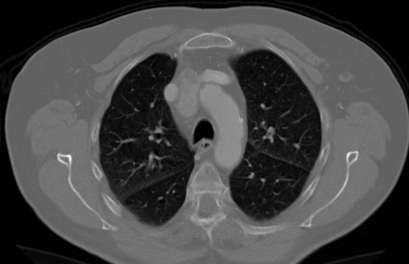

In [ ]:
cv2_imshow(i)

In [ ]:
from tensorflow.keras.layers import Input,Dense, MaxPool2D, Conv2D, Flatten

In [ ]:
from tensorflow.keras import Sequential, Input

In [ ]:
model=Sequential()

In [ ]:
model.add(Input([224,224,3]))
model.add(Conv2D(16,4,activation='tanh'))
model.add(MaxPool2D(5))
model.add(Conv2D(32,4,activation='tanh'))
model.add(MaxPool2D(5))
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 221, 221, 16)      784       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 44, 44, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 41, 41, 32)        8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
Total params: 9,008
Trainable params: 9,008
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Dense(1024,activation='tanh'))

In [ ]:
model.add(Dense(512,activation='tanh'))

In [ ]:
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 221, 221, 16)      784       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 44, 44, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 41, 41, 32)        8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 512)              

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit_generator(train_dataset,epochs=25)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
10/10 [==============================] - 176s 17s/step - loss: 2.0213 - accuracy: 0.3083
Epoch 2/25
10/10 [==============================] - 25s 2s/step - loss: 1.3441 - accuracy: 0.3556
Epoch 3/25
10/10 [==============================] - 24s 2s/step - loss: 1.2418 - accuracy: 0.4258
Epoch 4/25
10/10 [==============================] - 24s 2s/step - loss: 1.1377 - accuracy: 0.4910
Epoch 5/25
10/10 [==============================] - 24s 2s/step - loss: 1.0636 - accuracy: 0.5269
Epoch 6/25
10/10 [==============================] - 24s 2s/step - loss: 1.0168 - accuracy: 0.5188
Epoch 7/25
10/10 [==============================] - 24s 2s/step - loss: 0.9605 - accuracy: 0.5726
Epoch 8/25
10/10 [==============================] - 24s 2s/step - loss: 0.9721 - accuracy: 0.5367
Epoch 9/25
10/10 [==============================] - 24s 2s/step - loss: 0.9726 - accuracy: 0.5432
Epoch 10/25
10/10 [==============================] - 24s 2s/step - loss: 0.9555 - accuracy: 0.5628
Epoch 11/25
10/10

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet101V2

In [ ]:
baseModel = ResNet101V2(weights="imagenet", include_top=False,input_shape = (224,224,3))
for layer in baseModel.layers:
    layer.trainable = False

In [ ]:
baseModel.summary()

Model: "resnet101v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
________________________________________________________________________________________

In [ ]:
x = baseModel.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(4, activation = "softmax")(x)

In [ ]:
modell = Model(inputs= baseModel.input , outputs = x)

In [ ]:
modell.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
modell.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
modell.fit_generator(train_dataset,epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 [==============================] - 186s 18s/step - loss: 101.2282 - accuracy: 0.3148
Epoch 2/10
10/10 [==============================] - 175s 18s/step - loss: 17.5772 - accuracy: 0.5481
Epoch 3/10
10/10 [==============================] - 175s 17s/step - loss: 7.0243 - accuracy: 0.5971
Epoch 4/10
10/10 [==============================] - 176s 18s/step - loss: 4.4417 - accuracy: 0.6509
Epoch 5/10
10/10 [==============================] - 175s 18s/step - loss: 2.4968 - accuracy: 0.6835
Epoch 6/10
10/10 [==============================] - 174s 17s/step - loss: 1.5830 - accuracy: 0.6835
Epoch 7/10
10/10 [==============================] - 176s 17s/step - loss: 0.8207 - accuracy: 0.7015
Epoch 8/10
10/10 [==============================] - 175s 17s/step - loss: 0.7858 - accuracy: 0.6998
Epoch 9/10
10/10 [==============================] - 175s 17s/step - loss: 0.7099 - accuracy: 0.6982
Epoch 10/10
10/10 [==============================] - 175s 18s/step - loss: 0.6033 - accuracy: 0.7

In [ ]:
modell.fit_generator(train_dataset,epochs=5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
10/10 [==============================] - 175s 17s/step - loss: 0.6112 - accuracy: 0.7520
Epoch 2/5
10/10 [==============================] - 175s 17s/step - loss: 0.5539 - accuracy: 0.7814
Epoch 3/5
10/10 [==============================] - 183s 18s/step - loss: 0.5598 - accuracy: 0.7781
Epoch 4/5
10/10 [==============================] - 176s 18s/step - loss: 0.4518 - accuracy: 0.8010
Epoch 5/5
10/10 [==============================] - 175s 18s/step - loss: 0.4500 - accuracy: 0.8320


In [ ]:
modell.fit_generator(train_dataset,epochs=5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
10/10 [==============================] - 175s 17s/step - loss: 0.4398 - accuracy: 0.8140
Epoch 2/5
10/10 [==============================] - 177s 17s/step - loss: 0.4454 - accuracy: 0.8075
Epoch 3/5
10/10 [==============================] - 173s 17s/step - loss: 0.4843 - accuracy: 0.8124
Epoch 4/5
10/10 [==============================] - 177s 18s/step - loss: 0.4440 - accuracy: 0.8075
Epoch 5/5
10/10 [==============================] - 181s 18s/step - loss: 0.4024 - accuracy: 0.8434


In [ ]:
modell.fit_generator(train_dataset,epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 [==============================] - 174s 17s/step - loss: 0.3711 - accuracy: 0.8548
Epoch 2/10
10/10 [==============================] - 177s 18s/step - loss: 0.3961 - accuracy: 0.8401
Epoch 3/10
10/10 [==============================] - 173s 17s/step - loss: 0.3849 - accuracy: 0.8499
Epoch 4/10
10/10 [==============================] - 174s 17s/step - loss: 0.3438 - accuracy: 0.8662
Epoch 5/10
10/10 [==============================] - 174s 17s/step - loss: 0.3978 - accuracy: 0.8467
Epoch 6/10
10/10 [==============================] - 175s 17s/step - loss: 0.3865 - accuracy: 0.8483
Epoch 7/10
10/10 [==============================] - 174s 17s/step - loss: 0.3285 - accuracy: 0.8809
Epoch 8/10
10/10 [==============================] - 177s 18s/step - loss: 0.3623 - accuracy: 0.8532
Epoch 9/10
10/10 [==============================] - 177s 18s/step - loss: 0.3468 - accuracy: 0.8548
Epoch 10/10
10/10 [==============================] - 174s 17s/step - loss: 0.4006 - accuracy: 0.8532

In [ ]:
modell.fit_generator(train_dataset,epochs=3)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
10/10 [==============================] - 173s 17s/step - loss: 0.3340 - accuracy: 0.8728
Epoch 2/3
10/10 [==============================] - 178s 18s/step - loss: 0.2961 - accuracy: 0.8744
Epoch 3/3
10/10 [==============================] - 175s 17s/step - loss: 0.2989 - accuracy: 0.8777


In [ ]:
modell.fit_generator(train_dataset,epochs=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


10/10 [==============================] - 178s 18s/step - loss: 0.3194 - accuracy: 0.8793


In [ ]:
modell.save('/content/gdrive/MyDrive/modell.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
